# TestCase-ScorecardBundle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aritificial-Dataset" data-toc-modified-id="Aritificial-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aritificial Dataset</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#Feature-Discretization-with-ChiMerge" data-toc-modified-id="Feature-Discretization-with-ChiMerge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Discretization with ChiMerge</a></span></li><li><span><a href="#Feature-Encoding-with-Weight-of-Evidence-(WOE)" data-toc-modified-id="Feature-Encoding-with-Weight-of-Evidence-(WOE)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Encoding with Weight of Evidence (WOE)</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Eval" data-toc-modified-id="Eval-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Eval</a></span></li></ul></li></ul></div>

## Aritificial Dataset

Coverage:

- Data Types:
    - Feature with only one unique value.
    - Feature with many decimals (1e10-10).
    - Feature with less than 5 unique values.
    - Feature with more than 1000 unique values.
    - Feature with imbalanced distribution. e.g. heavy tails

- Predictbility:
    - Feature with high predictbility.
    - Feature with no predictbility. See what it does to ChiMerge

- Others:
    - More exterme values in the test set. Test set has smaller and larger values than the training set's minimum and maximum values respectively.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
# Generate artificial data
sample_size = 2000
training = pd.DataFrame({
    'y':[0]*1800+[1]*200 # dependent variable
    ,'f1':[0]*sample_size # Feature with only one unique value.
    ,'f2':[0]*1500+[0.1]*500+np.random.random(size=sample_size).round(10)/10000 # Feature with many decimals (1e10-10).
    ,'f3':[1]*500+[2]*500+[3]*500+[4]*500 # Feature with less than 5 unique values.
    ,'f4':np.arange(sample_size)+np.random.random(size=sample_size) # Feature with more than 1000 unique values.
    ,'f5':np.hstack([np.random.randint(low=-1e7,high=-1e3,size=100),
           np.random.randint(low=0,high=1000,size=1800),
           np.random.randint(low=1e3,high=1e8,size=100)]) # Feature with imbalanced distribution. e.g. heavy tails 
    ,'f6':np.hstack([np.random.randint(low=0,high=1000,size=1930),
                     np.random.randint(low=1e3,high=1e5,size=50),
                    np.random.randint(low=1e5,high=1e8,size=20)]) # Feature with imbalanced distribution. e.g. heavy tails    
    ,'f7':np.random.random(size=sample_size) # Feature with no predictbility
    ,'f8':[0]*1000+ [1]*1000 # Feature with high predictbility
})
validation = pd.DataFrame({
    'y':[0]*1800+[1]*200  # # More exterme values in the test set    
    ,'f1':[1]+[0]*(sample_size-1)
    ,'f2':[0]*1500+[0.1]*500+np.random.random(size=sample_size).round(10)/10000 
    ,'f3':[1]*500+[2]*500+[3]*500+[4]*500 
    ,'f4':np.arange(sample_size)+np.random.random(size=sample_size) 
    ,'f5':np.hstack([np.random.randint(low=-1e7,high=-1e3,size=100),
           np.random.randint(low=0,high=1000,size=1800),
           np.random.randint(low=1e3,high=1e8,size=100)]) 
    ,'f6':np.hstack([np.random.randint(low=0,high=1000,size=1930),
                     np.random.randint(low=1e3,high=1e5,size=50),
                    np.random.randint(low=1e8,high=1e9,size=20)]) # More exterme values in the test set    
    ,'f7':np.random.random(size=sample_size) 
    ,'f8':[0]*1000+ [1]*1000 
})

In [139]:
training

,y,f1,f2,f3,f4,f5,f6,f7,f8
0,0,0,0.000098,1,0.038693,-6730360,134,0.608626,0
1,0,0,0.000043,1,1.185057,-4760550,812,0.583608,0
2,0,0,0.000061,1,2.181966,-4768047,876,0.646802,0
3,0,0,0.000049,1,3.959933,-8800294,993,0.790514,0
4,0,0,0.000066,1,4.395410,-2135312,434,0.944598,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.100071,4,1995.757681,47136729,30627989,0.006253,1
1996,1,0,0.100098,4,1996.314472,60625202,14659640,0.107845,1
1997,1,0,0.100088,4,1997.645229,83751045,13839100,0.927230,1
1998,1,0,0.100034,4,1998.622374,66050916,5437155,0.631082,1


In [140]:
validation

,y,f1,f2,f3,f4,f5,f6,f7,f8
0,0,1,0.000045,1,0.552829,-6661252,792,0.792546,0
1,0,0,0.000083,1,1.954748,-4911833,387,0.336662,0
2,0,0,0.000023,1,2.785235,-6192090,317,0.117480,0
3,0,0,0.000007,1,3.713068,-9647539,292,0.740053,0
4,0,0,0.000098,1,4.397140,-7666190,173,0.629397,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.100075,4,1995.493565,59297799,576879076,0.904543,1
1996,1,0,0.100045,4,1996.582479,85763647,843026403,0.950076,1
1997,1,0,0.100064,4,1997.606293,81348714,365963816,0.066709,1
1998,1,0,0.100095,4,1998.033567,406430,259878373,0.481720,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC3A93C788>,
      dtype=object)

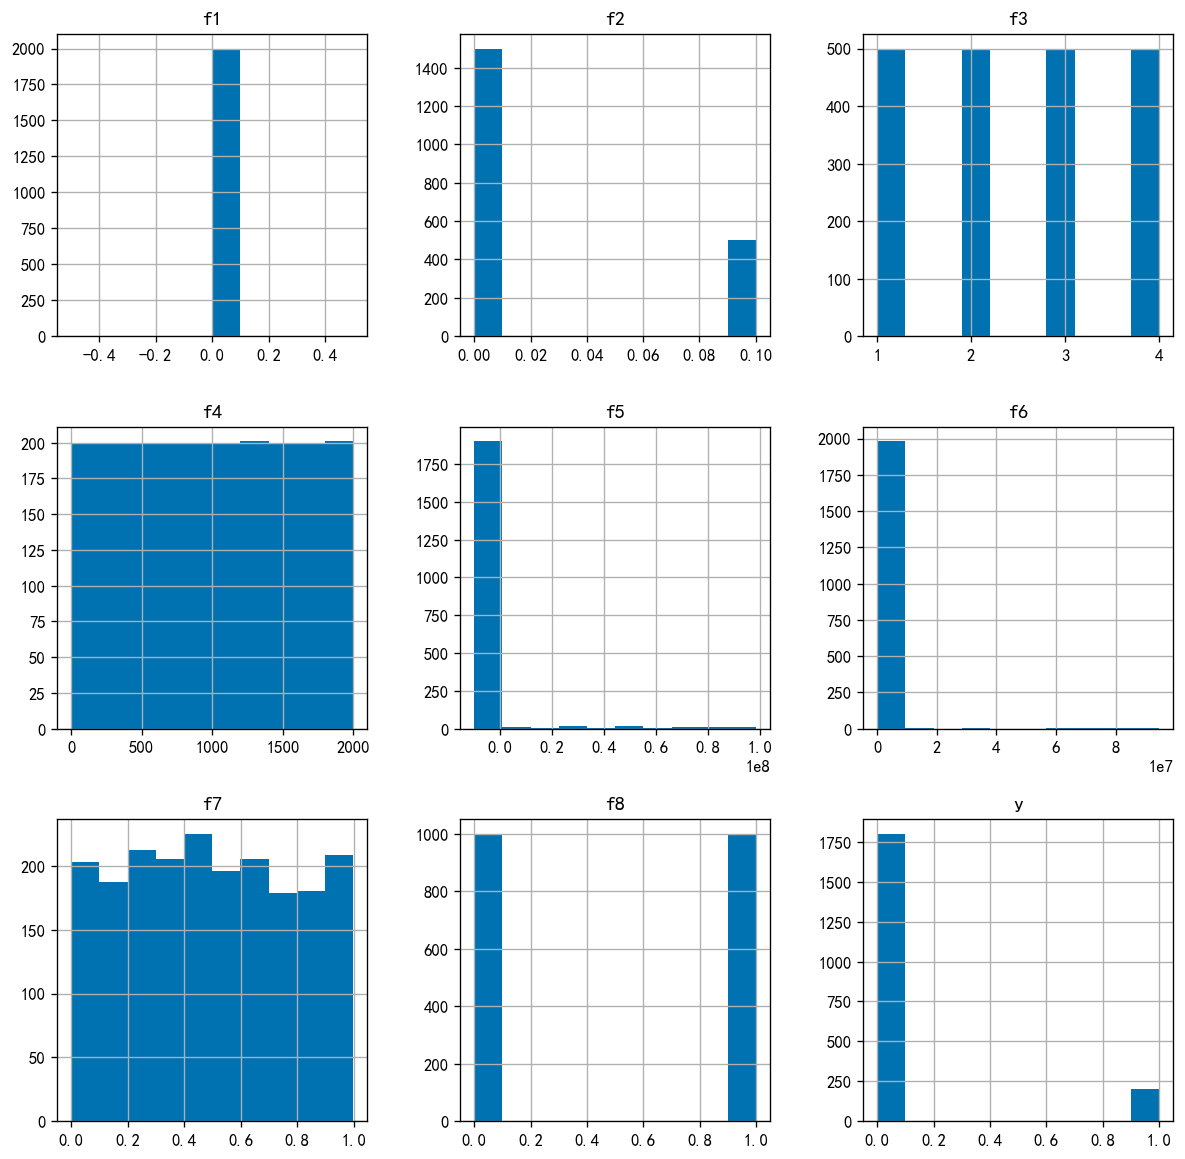

In [141]:
training.hist(figsize=(12,12))

## Test

In [142]:
X_train, y_train = training.drop('y',axis=1).copy(), training['y'].copy()
X_val, y_val = validation.drop('y',axis=1).copy(), validation['y'].copy()

In [227]:
import sys
from imp import reload
sys.path.append('D:\\WH_Codes\\Github\\Scorecard-Bundle\\scorecardbundle')
# from scorecardbundle.feature_discretization import ChiMerge as cm
# from scorecardbundle.feature_encoding import WOE as woe
# from scorecardbundle.feature_selection import FeatureSelection as fs
# from scorecardbundle.model_training import LogisticRegressionScoreCard as lrsc
# from scorecardbundle.model_evaluation import ModelEvaluation as me
from feature_discretization import ChiMerge as cm
from feature_encoding import WOE as woe
from feature_selection import FeatureSelection as fs
from model_training import LogisticRegressionScoreCard as lrsc
from model_evaluation import ModelEvaluation as me
reload(cm)
reload(woe)
reload(fs)
reload(lrsc)
reload(me)

<module 'model_evaluation.ModelEvaluation' from 'D:\\WH_Codes\\Github\\Scorecard-Bundle\\scorecardbundle\\model_evaluation\\ModelEvaluation.py'>

### Feature Discretization with ChiMerge

In [228]:
trans_cm = cm.ChiMerge(max_intervals=5, min_intervals=1, output_dataframe=True)
result_cm = trans_cm.fit_transform(X_train, y_train) 
result_cm.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,0.435628769415294~0.9391727673082131,-inf~0.0
1,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,780.0~991.0,0.435628769415294~0.9391727673082131,-inf~0.0
2,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,780.0~991.0,0.435628769415294~0.9391727673082131,-inf~0.0
3,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,991.0~17390.469999999623,0.435628769415294~0.9391727673082131,-inf~0.0
4,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,0.9391727673082131~0.9606393899897263,-inf~0.0


In [229]:
result_cm_val = trans_cm.transform(X_val)
result_cm_val.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,780.0~991.0,0.435628769415294~0.9391727673082131,-inf~0.0
1,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,-inf~0.395496876300114,-inf~0.0
2,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,-inf~0.395496876300114,-inf~0.0
3,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,0.435628769415294~0.9391727673082131,-inf~0.0
4,-inf~inf,-inf~0.025074971815007504,-inf~3.0,-inf~1799.7601441702277,-inf~167.0,59.0~780.0,0.435628769415294~0.9391727673082131,-inf~0.0


In [230]:
trans_cm.boundaries_

{'f1': array([inf]),
 'f2': array([0.02507497, 0.10005509, 0.10007215, 0.10007685,        inf]),
 'f3': array([ 3., inf]),
 'f4': array([1799.76014417,           inf]),
 'f5': array([  167.        ,   193.77      ,   205.76      , 20444.00000007,
                   inf]),
 'f6': array([   59.  ,   780.  ,   991.  , 17390.47,      inf]),
 'f7': array([0.39549688, 0.43562877, 0.93917277, 0.96063939,        inf]),
 'f8': array([ 0., inf])}

In [231]:
for f in result_cm.columns:
    print('='*50,f)
    print(result_cm[f].value_counts())

================================================== f1
-inf~inf    2000
Name: f1, dtype: int64
================================================== f2
-inf~0.025074971815007504                  1500
0.025074971815007504~0.100055090728124      300
0.10007685259322051~inf                     100
0.100055090728124~0.10007214730732142        80
0.10007214730732142~0.10007685259322051      20
Name: f2, dtype: int64
================================================== f3
-inf~3.0    1500
3.0~inf      500
Name: f3, dtype: int64
================================================== f4
-inf~1799.7601441702277    1800
1799.7601441702277~inf      200
Name: f4, dtype: int64
================================================== f5
205.76~20444.00000007074     1420
-inf~167.0                    402
20444.00000007074~inf         100
167.0~193.77000000000004       58
193.77000000000004~205.76      20
Name: f5, dtype: int64
================================================== f6
59.0~780.0                  1380
780

In [232]:
for f in result_cm_val.columns:
    print('='*50,f)
    print(result_cm_val[f].value_counts())

================================================== f1
-inf~inf    2000
Name: f1, dtype: int64
================================================== f2
-inf~0.025074971815007504                  1500
0.025074971815007504~0.100055090728124      288
0.10007685259322051~inf                     123
0.100055090728124~0.10007214730732142        72
0.10007214730732142~0.10007685259322051      17
Name: f2, dtype: int64
================================================== f3
-inf~3.0    1500
3.0~inf      500
Name: f3, dtype: int64
================================================== f4
-inf~1799.7601441702277    1800
1799.7601441702277~inf      200
Name: f4, dtype: int64
================================================== f5
205.76~20444.00000007074     1418
-inf~167.0                    408
20444.00000007074~inf         100
167.0~193.77000000000004       52
193.77000000000004~205.76      22
Name: f5, dtype: int64
================================================== f6
59.0~780.0                  1390
780

### Feature Encoding with Weight of Evidence (WOE)


In [233]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm, y_train) # WOE is fast. This only takes less then 1 seconds
result_woe.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-0.068520,-23.025851
1,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.917597,-0.068520,-23.025851
2,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.917597,-0.068520,-23.025851
3,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,2.515678,-0.068520,-23.025851
4,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-23.025851,-23.025851


In [234]:
result_woe_val = trans_woe.transform(result_cm_val) 
result_woe_val.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.917597,-0.068520,-23.025851
1,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-0.056833,-23.025851
2,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-0.056833,-23.025851
3,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-0.068520,-23.025851
4,-8.000555e-10,-23.025851,-23.025851,-23.025851,-1.835751,-0.268990,-0.068520,-23.025851


In [235]:
trans_woe.iv_ # the information value (iv) for each feature

{'f1': 0.0,
 'f2': 20.737527679814885,
 'f3': 20.681341998570705,
 'f4': 53.54724380286517,
 'f5': 15.510557166490537,
 'f6': 9.1594780731172,
 'f7': 0.5750832923635975,
 'f8': 13.242656191833948}

In [236]:
trans_woe.result_dict_ # the WOE dictionary and iv for each feature

{'f1': ({'-inf~inf': -8.000554666412699e-10}, 0.0),
 'f2': ({'-inf~0.025074971815007504': -23.025850929940457,
   '0.025074971815007504~0.100055090728124': 1.6362990306376797,
   '0.100055090728124~0.10007214730732142': 2.2973080350006234,
   '0.10007214730732142~0.10007685259322051': 0.8109302153545235,
   '0.10007685259322051~inf': 1.9965538809858303},
  20.737527679814885),
 'f3': ({'-inf~3.0': -23.025850929940457, '3.0~inf': 1.7917594683443885},
  20.681341998570705),
 'f4': ({'-inf~1799.7601441702277': -23.025850929940457,
   '1799.7601441702277~inf': 30.521392872924714},
  53.54724380286517),
 'f5': ({'-inf~167.0': -1.835751038782858,
   '167.0~193.77000000000004': 0.037740327177220416,
   '193.77000000000004~205.76': 1.5781853680429385,
   '20444.00000007074~inf': 29.828245692364767,
   '205.76~20444.00000007074': -0.6211736816488195},
  15.510557166490537),
 'f6': ({'-inf~59.0': -1.336461987892189,
   '17390.469999999623~inf': 29.31742006859878,
   '59.0~780.0': -0.268989940208

### Feature Selection


In [152]:
fs.selection_with_iv_corr(trans_woe, result_woe)

,factor,IV,woe_dict,corr_with
3,f4,53.547244,{'-inf~1799.7601441702277': -23.02585092994045...,{'f5': 0.6938467012799907}
1,f2,20.737528,{'-inf~0.025074971815007504': -23.025850929940...,{'f3': 0.9998893569968313}
2,f3,20.681342,"{'-inf~3.0': -23.025850929940457, '3.0~4.0': 1...",{'f2': 0.9998893569968313}
4,f5,15.510557,"{'-inf~167.0': -1.835751038782858, '167.0~193....","{'f4': 0.6938467012799907, 'f6': 0.77695511061..."
7,f8,13.242656,"{'-inf~0.0': -23.025850929940457, '0.0~1.0': 0...",{}
5,f6,9.159478,"{'-inf~59.0': -1.336461987892189, '17390.46999...",{'f5': 0.7769551106102661}
6,f7,0.575083,{'-inf~0.395496876300114': -0.0568334755574560...,{}
0,f1,0.000000,{'-inf~0.0': -8.000554666412699e-10},{}


### Model Training

In [237]:
model = lrsc.LogisticRegressionScoreCard(trans_woe, PDO=-20, basePoints=100, verbose=True)
model.fit(result_woe, y_train)

In [238]:
model.woe_df_

,feature,value,woe,beta,score
0,f1,-inf~inf,-8.000555e-10,-8.494761e-14,12.0
1,f2,-inf~0.025074971815007504,-2.302585e+01,4.694089e-02,-19.0
2,f2,0.025074971815007504~0.100055090728124,1.636299e+00,4.694089e-02,15.0
3,f2,0.100055090728124~0.10007214730732142,2.297308e+00,4.694089e-02,16.0
4,f2,0.10007214730732142~0.10007685259322051,8.109302e-01,4.694089e-02,14.0
5,f2,0.10007685259322051~inf,1.996554e+00,4.694089e-02,15.0
6,f3,-inf~3.0,-2.302585e+01,4.644050e-02,-18.0
7,f3,3.0~inf,1.791759e+00,4.644050e-02,15.0
8,f4,-inf~1799.7601441702277,-2.302585e+01,3.856924e-01,-244.0
9,f4,1799.7601441702277~inf,3.052139e+01,3.856924e-01,352.0


In [239]:
result = model.predict(X_train) # Scorecard should be applied on the original feature values
result.head()

,f1,f2,f3,f4,f5,f6,f7,f8,TotalScore
0,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
1,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
2,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
3,12.0,-19.0,-18.0,-244.0,10.0,14.0,12.0,-3.0,-236.0
4,12.0,-19.0,-18.0,-244.0,10.0,12.0,9.0,-3.0,-241.0


In [240]:
result_val = model.predict(X_val) # Scorecard should be applied on the original feature values
result_val.head()

,f1,f2,f3,f4,f5,f6,f7,f8,TotalScore
0,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
1,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
2,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
3,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0
4,12.0,-19.0,-18.0,-244.0,10.0,12.0,12.0,-3.0,-238.0


### Eval

KS = 1.0


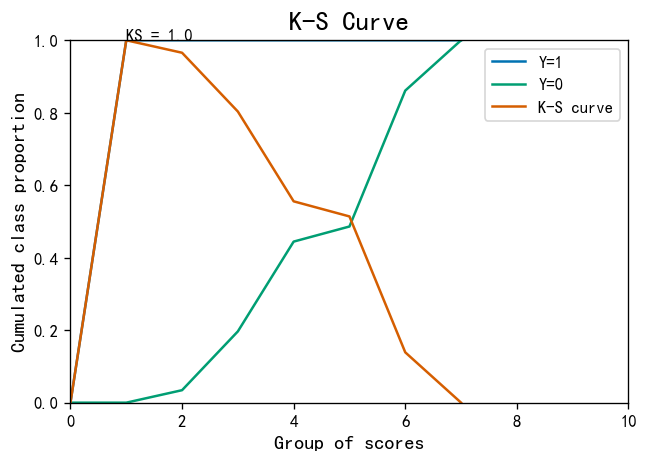

AUC: 1.0


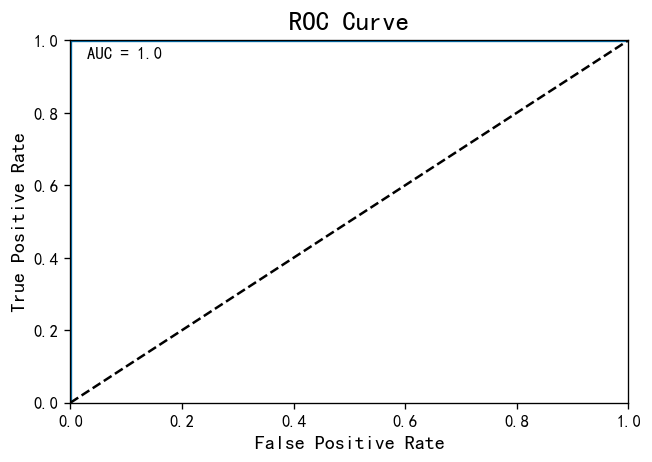

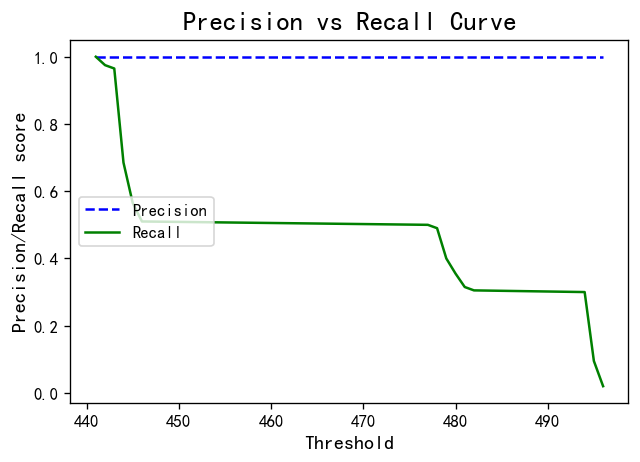

In [244]:
evaluation = me.BinaryTargets(y_train, result['TotalScore'])
evaluation.plot_all()

KS = 1.0


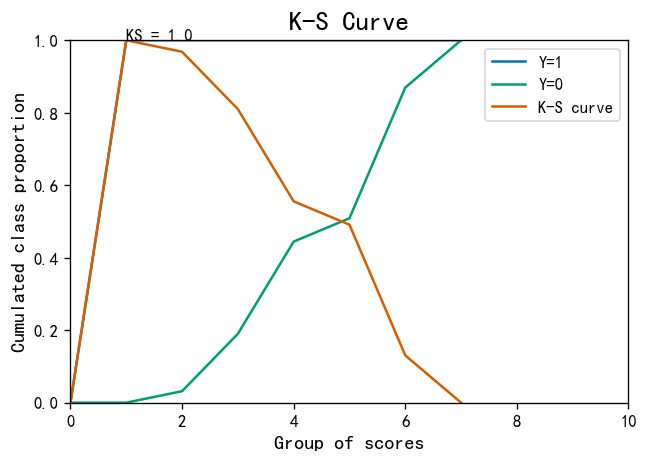

AUC: 1.0


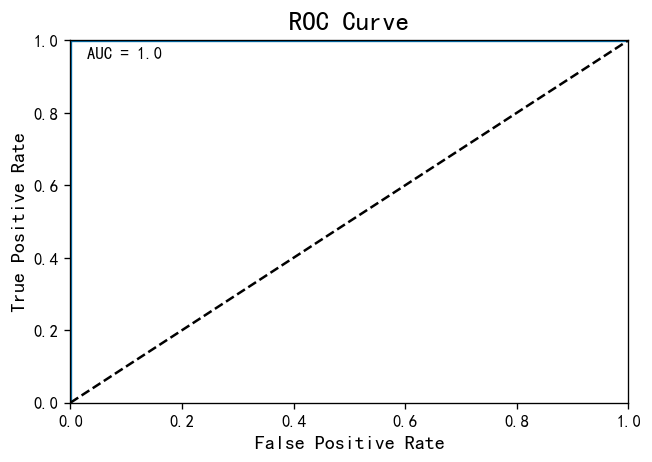

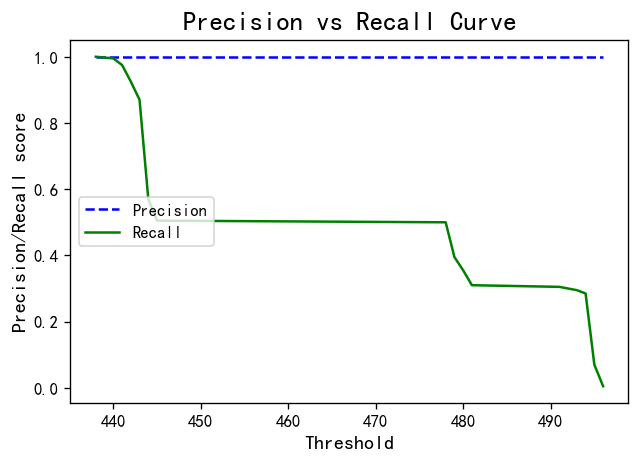

In [245]:
evaluation = me.BinaryTargets(y_val, result_val['TotalScore'])
evaluation.plot_all()